# Classification with Linear Regression

## Learning Objectives

By the end of this notebook, you will be able to:

1. **Understand the concept** of using linear regression for classification tasks
2. **Implement** a linear regression classifier using scikit-learn
3. **Evaluate** classification performance using appropriate metrics
4. **Visualize** decision boundaries and understand their limitations
5. **Interpret** model coefficients and their statistical significance
6. **Recognize** when linear regression is appropriate for classification and when it's not

## What is Classification with Linear Regression?

Traditionally, linear regression is used for **regression** problems where we predict continuous values. However, it can also be adapted for **classification** problems where we predict discrete categories or classes.

### Key Concepts:

- **Ordinal Encoding**: We treat class labels as numeric values (0, 1, 2, etc.)
- **Linear Decision Boundaries**: The model creates linear boundaries to separate classes
- **Rounding Predictions**: We round the continuous predictions to the nearest integer class
- **Limitations**: This approach works best when classes are naturally ordered and linearly separable

### When to Use Linear Regression for Classification:

✅ **Good for:**
- Classes that are naturally ordered (e.g., low/medium/high)
- Simple, linearly separable problems
- Quick prototyping and baseline models
- Educational purposes to understand classification concepts

❌ **Not ideal for:**
- Non-linearly separable data
- Classes without natural ordering
- High-dimensional problems
- Production systems (logistic regression is usually better)

## Required Libraries

Let's import all the necessary libraries for this exercise. We'll use:
- **NumPy & Pandas**: For data manipulation
- **Matplotlib & Seaborn**: For visualization
- **Scikit-learn**: For machine learning models and evaluation
- **Statsmodels**: For statistical analysis 

In [3]:
# Standard imports for data manipulation
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           precision_score, recall_score, classification_report)

# Statistical analysis
import statsmodels.api as sm

# Set plotting style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

## The Wine Dataset

The wine dataset in scikit-learn is a classic dataset commonly used in machine learning for classification tasks. This dataset is included in the sklearn.datasets module and can be easily loaded for experimentation and educational purposes. 

You can (and should) read about the dataset here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

### Dataset Characteristics:

- **Origin**: The dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars (types of grape). The analysis determined the quantities of 13 constituents found in each of the three types of wines.
- **Features**: The dataset contains 13 different measurements taken from the analysis of the wines, which serve as the features. These measurements include aspects such as:
    - Alcohol content
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium content
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline (a type of amino acid)
- **Target Variable**: The target variable in this dataset is the type of wine, which is a categorical variable indicating one of the three possible cultivars (Class 0, Class 1, Class 2).
- **Dataset Size**: The dataset includes **178 samples**, which is sufficient for learning but small enough for quick experimentation.

### Why This Dataset is Good for Learning:

1. **Clear Classes**: Three distinct wine types that are chemically different
2. **Interpretable Features**: Chemical measurements that make sense
3. **Appropriate Size**: Not too large, not too small
4. **Real-world Relevance**: Wine classification is a practical application

### Our Focus:

For this exercise, we will focus on just **two features**:
- **Alcohol content** (feature 0)
- **OD280/OD315 of diluted wines** (feature 11) - This measures protein content

This simplification helps us:
- Visualize the data in 2D
- Understand the linear decision boundaries
- Focus on the core concepts without complexity 

## Step 1: Load and Explore the Data

Let's start by loading the wine dataset and examining its structure.


In [4]:
# Load the wine dataset
wine = load_wine()

# Extract the two features we'll use
feature_1 = wine.feature_names[0]  # alcohol
feature_2 = wine.feature_names[11] # od280/od315_of_diluted_wines
print(f"The features are '{feature_1}' and '{feature_2}'")

# Create a DataFrame with our selected features and target
df = pd.DataFrame({
    'alcohol': wine.data[:, 0], 
    'od': wine.data[:, 11], 
    'target': wine.target
})

# Display basic information about the dataset
print(f"\nDataset shape: {df.shape}")
print(f"Target classes: {np.unique(wine.target)}")
print(f"Class names: {wine.target_names}")

# Split data into training and testing sets
# Using 15% for testing with random_state=5 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    df[['alcohol', 'od']], 
    df['target'], 
    random_state=5, 
    test_size=0.15
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

The features are 'alcohol' and 'od280/od315_of_diluted_wines'

Dataset shape: (178, 3)
Target classes: [0 1 2]
Class names: ['class_0' 'class_1' 'class_2']

Training set size: 151
Testing set size: 27


In [5]:
# Let's examine the first few rows of our dataset
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,alcohol,od,target
0,14.23,3.92,0
1,13.20,3.40,0
2,13.16,3.17,0
3,14.37,3.45,0
4,13.24,2.93,0
5,14.20,2.85,0
6,14.39,3.58,0
7,14.06,3.58,0
8,14.83,2.85,0
9,13.86,3.55,0


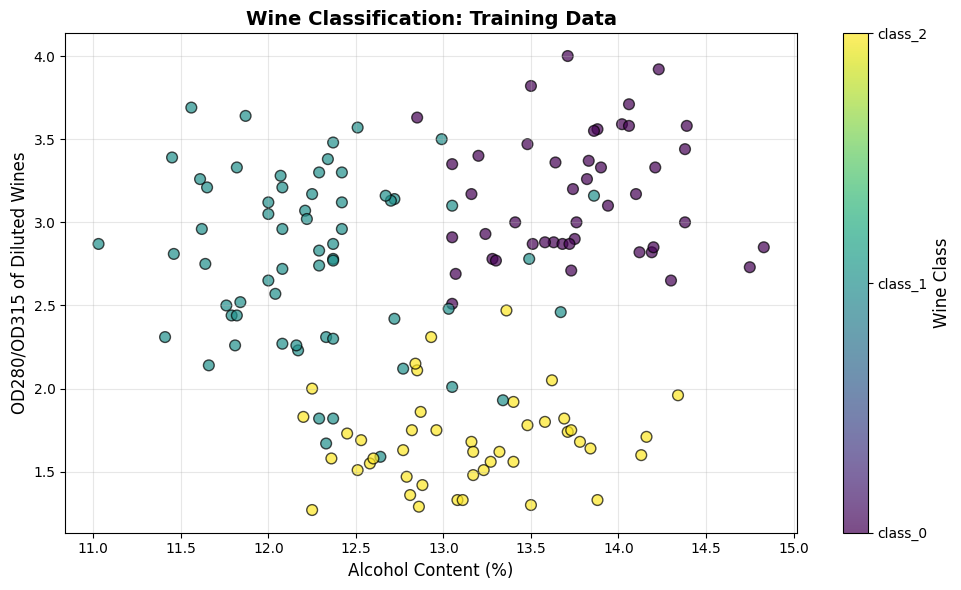

Class distribution in training set:
target
0    45
1    62
2    44
Name: count, dtype: int64


In [6]:
# Visualize the training data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train['alcohol'], X_train['od'], c=y_train, 
                     edgecolors='k', cmap='viridis', alpha=0.7, s=60)
plt.xlabel('Alcohol Content (%)', fontsize=12)
plt.ylabel('OD280/OD315 of Diluted Wines', fontsize=12)
plt.title('Wine Classification: Training Data', fontsize=14, fontweight='bold')

# Add colorbar with class labels
cbar = plt.colorbar(scatter)
cbar.set_label('Wine Class', fontsize=12)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(wine.target_names)

# Add grid for better readability
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print class distribution
print("Class distribution in training set:")
print(y_train.value_counts().sort_index())

## Step 2: Understanding Linear Regression for Classification

### How Linear Regression Works for Classification:

1. **Ordinal Encoding**: We treat the class labels (0, 1, 2) as continuous values
2. **Linear Model**: We fit a line/plane that predicts these continuous values
3. **Rounding**: We round the predictions to the nearest integer to get class predictions
4. **Decision Boundaries**: The model creates linear boundaries between classes

### The Mathematical Approach:

For a 2-feature, 3-class problem, our linear model is:
```
predicted_class = β₀ + β₁×alcohol + β₂×od280/od315
```

Where:
- β₀ is the intercept
- β₁ is the coefficient for alcohol content
- β₂ is the coefficient for OD280/OD315

### Why This Works (and When It Doesn't):

✅ **Works well when:**
- Classes are linearly separable
- Classes have a natural ordering
- Data is not too complex

❌ **Limitations:**
- Can only create linear decision boundaries
- Assumes classes are ordered
- May predict values outside the valid class range
- Less robust than dedicated classification algorithms


In [7]:
# Step 3: Train the Linear Regression Model

# Create and fit the linear regression model
print("Training Linear Regression Model...")
lr = LinearRegression()
model = lr.fit(X_train, y_train)

# Display model coefficients
print(f"\nModel Coefficients:")
print(f"Intercept (β₀): {model.intercept_:.4f}")
print(f"Alcohol coefficient (β₁): {model.coef_[0]:.4f}")
print(f"OD280/OD315 coefficient (β₂): {model.coef_[1]:.4f}")

# Make predictions on the testing set
# Note: We round the predictions to get integer class labels
y_pred_continuous = model.predict(X_test)
y_pred = np.round(y_pred_continuous)

print(f"\nPrediction range before rounding: {y_pred_continuous.min():.2f} to {y_pred_continuous.max():.2f}")
print(f"Prediction range after rounding: {y_pred.min()} to {y_pred.max()}")

# Show some example predictions
print(f"\nFirst 10 predictions:")
for i in range(min(10, len(y_test))):
    print(f"True: {y_test.iloc[i]}, Predicted: {y_pred[i]}, Raw: {y_pred_continuous[i]:.3f}")

Training Linear Regression Model...

Model Coefficients:
Intercept (β₀): 6.2457
Alcohol coefficient (β₁): -0.2419
OD280/OD315 coefficient (β₂): -0.8227

Prediction range before rounding: -0.10 to 2.11
Prediction range after rounding: -0.0 to 2.0

First 10 predictions:
True: 0, Predicted: 0.0, Raw: 0.093
True: 1, Predicted: 0.0, Raw: 0.458
True: 0, Predicted: -0.0, Raw: -0.069
True: 0, Predicted: 1.0, Raw: 0.786
True: 2, Predicted: 1.0, Raw: 1.485
True: 2, Predicted: 2.0, Raw: 1.709
True: 0, Predicted: 1.0, Raw: 0.573
True: 0, Predicted: 0.0, Raw: 0.185
True: 1, Predicted: 1.0, Raw: 1.066
True: 0, Predicted: 0.0, Raw: 0.456


In [8]:
# Step 4: Evaluate Model Performance

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy:.4f} ({accuracy*100:.1f}%)')

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Weighted Precision: {precision:.4f}')
print(f'Weighted Recall: {recall:.4f}')

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Weighted F1-Score: {f1_score:.4f}')

# Show detailed classification report
print(f'\nDetailed Classification Report:')
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Overall Accuracy: 0.7037 (70.4%)
Weighted Precision: 0.7926
Weighted Recall: 0.7037
Weighted F1-Score: 0.7455

Detailed Classification Report:
              precision    recall  f1-score   support

     class_0       0.90      0.64      0.75        14
     class_1       0.53      0.89      0.67         9
     class_2       1.00      0.50      0.67         4

    accuracy                           0.70        27
   macro avg       0.81      0.68      0.69        27
weighted avg       0.79      0.70      0.71        27



/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


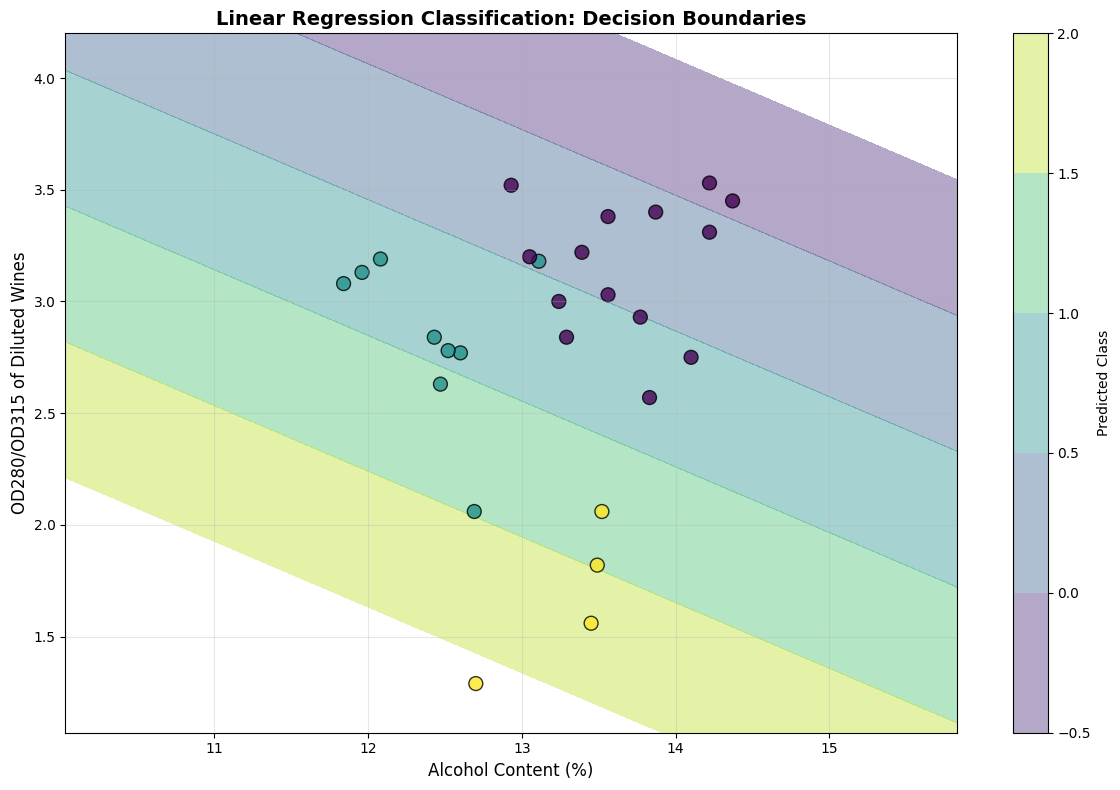

Note: The colored regions show the model's decision boundaries.
Points represent actual test data with their true class labels.


In [9]:
# Step 5: Visualize Decision Boundaries

# Create a meshgrid for plotting decision boundaries
x1_min, x1_max = df['alcohol'].min() - 1, df['alcohol'].max() + 1
x2_min, x2_max = df['od'].min() - 0.2, df['od'].max() + 0.2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 300), 
                       np.linspace(x2_min, x2_max, 300))

# Get predictions for the meshgrid
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot decision boundaries
contour = plt.contourf(xx1, xx2, Z, alpha=0.4, levels=np.arange(-0.5, 2.5, 0.5), 
                      cmap='viridis')
plt.colorbar(contour, label='Predicted Class')

# Plot test data points
scatter = plt.scatter(X_test['alcohol'], X_test['od'], c=y_test, 
                     edgecolors='k', cmap='viridis', s=100, alpha=0.8)

# Add labels and title
plt.xlabel('Alcohol Content (%)', fontsize=12)
plt.ylabel('OD280/OD315 of Diluted Wines', fontsize=12)
plt.title('Linear Regression Classification: Decision Boundaries', 
          fontsize=14, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Note: The colored regions show the model's decision boundaries.")
print("Points represent actual test data with their true class labels.")


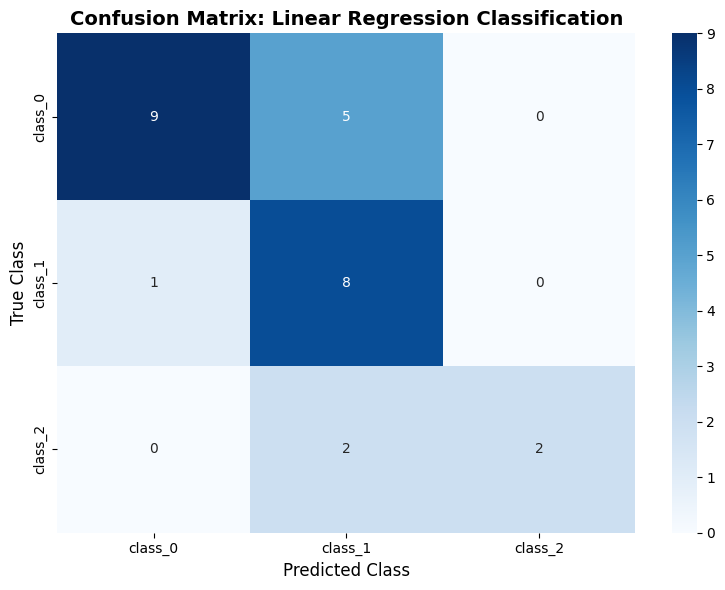

Confusion Matrix Interpretation:
Rows = True Classes, Columns = Predicted Classes
Class 0 (class_0): 9 correct, 5 misclassified
Class 1 (class_1): 8 correct, 1 misclassified
Class 2 (class_2): 2 correct, 2 misclassified


In [10]:
# Step 6: Confusion Matrix Analysis

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a more informative confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names, 
            yticklabels=wine.target_names)
plt.title('Confusion Matrix: Linear Regression Classification', 
          fontsize=14, fontweight='bold')
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.tight_layout()
plt.show()

# Print confusion matrix with interpretation
print("Confusion Matrix Interpretation:")
print("Rows = True Classes, Columns = Predicted Classes")
print(f"Class 0 (class_0): {conf_matrix[0,0]} correct, {conf_matrix[0,1:].sum()} misclassified")
print(f"Class 1 (class_1): {conf_matrix[1,1]} correct, {conf_matrix[1,0] + conf_matrix[1,2]} misclassified")
print(f"Class 2 (class_2): {conf_matrix[2,2]} correct, {conf_matrix[2,0:2].sum()} misclassified")

In [11]:
# Step 7: Statistical Analysis of Model Coefficients

# Use statsmodels for detailed statistical analysis
X_sm = sm.add_constant(X_train)
smodel = sm.OLS(y_train, X_sm).fit()

print("Statistical Analysis of Model Coefficients:")
print("=" * 50)
print(smodel.summary())

print("\n" + "=" * 50)
print("INTERPRETATION OF RESULTS:")
print("=" * 50)

# Extract key statistics
coef_alcohol = smodel.params['alcohol']
p_alcohol = smodel.pvalues['alcohol']
coef_od = smodel.params['od']
p_od = smodel.pvalues['od']

print(f"\n1. Alcohol Content Coefficient: {coef_alcohol:.4f}")
print(f"   - P-value: {p_alcohol:.4f}")
if p_alcohol < 0.05:
    print("   - SIGNIFICANT: Alcohol content is important for classification")
else:
    print("   - NOT SIGNIFICANT: Alcohol content may not be important")

print(f"\n2. OD280/OD315 Coefficient: {coef_od:.4f}")
print(f"   - P-value: {p_od:.4f}")
if p_od < 0.05:
    print("   - SIGNIFICANT: OD280/OD315 is important for classification")
else:
    print("   - NOT SIGNIFICANT: OD280/OD315 may not be important")

print(f"\n3. Model R-squared: {smodel.rsquared:.4f}")
print(f"   - This means {smodel.rsquared*100:.1f}% of variance in wine class is explained by the model")

print(f"\n4. F-statistic: {smodel.fvalue:.2f} (p-value: {smodel.f_pvalue:.2e})")
if smodel.f_pvalue < 0.05:
    print("   - Model is statistically significant overall")
else:
    print("   - Model is not statistically significant")

Statistical Analysis of Model Coefficients:
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     159.3
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           1.24e-37
Time:                        13:16:07   Log-Likelihood:                -87.641
No. Observations:                 151   AIC:                             181.3
Df Residuals:                     148   BIC:                             190.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

In [12]:
# Step 8: Practical Example - Making Predictions

# Let's make a prediction for a new wine sample
print("PRACTICAL EXAMPLE: Making Predictions")
print("=" * 40)

# Example wine: 13.8% alcohol, 3.3 OD280/OD315
new_wine = np.array([[13.8, 3.3]])
prediction_continuous = model.predict(new_wine)
prediction_class = int(np.round(prediction_continuous))

print(f"New wine sample: 13.8% alcohol, 3.3 OD280/OD315")
print(f"Raw prediction: {prediction_continuous[0]:.3f}")
print(f"Predicted class: {prediction_class}")
print(f"Predicted wine type: {wine.target_names[prediction_class]}")

# Show the decision process
print(f"\nDecision Process:")
print(f"Model equation: {model.intercept_:.3f} + {model.coef_[0]:.3f}×alcohol + {model.coef_[1]:.3f}×od")
print(f"Calculation: {model.intercept_:.3f} + {model.coef_[0]:.3f}×{new_wine[0,0]} + {model.coef_[1]:.3f}×{new_wine[0,1]} = {prediction_continuous[0]:.3f}")
print(f"Rounded to nearest integer: {prediction_class}")

PRACTICAL EXAMPLE: Making Predictions
New wine sample: 13.8% alcohol, 3.3 OD280/OD315
Raw prediction: 0.193
Predicted class: 0
Predicted wine type: class_0

Decision Process:
Model equation: 6.246 + -0.242×alcohol + -0.823×od
Calculation: 6.246 + -0.242×13.8 + -0.823×3.3 = 0.193
Rounded to nearest integer: 0


/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_58428/205045383.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction_class = int(np.round(prediction_continuous))


In [13]:
# Step 9: Limitations and Better Alternatives

print("LIMITATIONS OF LINEAR REGRESSION FOR CLASSIFICATION")
print("=" * 55)

print("\n1. LINEAR DECISION BOUNDARIES:")
print("   - Can only create straight-line boundaries")
print("   - Cannot handle non-linearly separable data")
print("   - May not capture complex relationships")

print("\n2. ORDINAL ASSUMPTION:")
print("   - Assumes classes are naturally ordered (0, 1, 2)")
print("   - May not make sense for categorical data")
print("   - Can predict values outside valid class range")

print("\n3. PROBABILITY INTERPRETATION:")
print("   - Cannot provide probability estimates")
print("   - No measure of prediction confidence")
print("   - Less robust than dedicated classification methods")

print("\nBETTER ALTERNATIVES:")
print("=" * 20)
print("✅ Logistic Regression - For binary classification")
print("✅ Multinomial Logistic Regression - For multi-class")
print("✅ Decision Trees - For non-linear boundaries")
print("✅ Random Forest - For robust classification")
print("✅ Support Vector Machines - For complex boundaries")
print("✅ Neural Networks - For very complex patterns")


LIMITATIONS OF LINEAR REGRESSION FOR CLASSIFICATION

1. LINEAR DECISION BOUNDARIES:
   - Can only create straight-line boundaries
   - Cannot handle non-linearly separable data
   - May not capture complex relationships

2. ORDINAL ASSUMPTION:
   - Assumes classes are naturally ordered (0, 1, 2)
   - May not make sense for categorical data
   - Can predict values outside valid class range

3. PROBABILITY INTERPRETATION:
   - Cannot provide probability estimates
   - No measure of prediction confidence
   - Less robust than dedicated classification methods

BETTER ALTERNATIVES:
✅ Logistic Regression - For binary classification
✅ Multinomial Logistic Regression - For multi-class
✅ Decision Trees - For non-linear boundaries
✅ Random Forest - For robust classification
✅ Support Vector Machines - For complex boundaries
✅ Neural Networks - For very complex patterns


## Exercise Questions and Answers

### Question 1: Model Construction and Prediction
**Q: What is the model you constructed from the dataset? How would it classify the wine with 13.8% alcohol and 3.3 dilute?**

**A:** The model is a linear regression equation:
```
predicted_class = 6.246 - 0.242×alcohol - 0.823×od280/od315
```

For a wine with 13.8% alcohol and 3.3 OD280/OD315:
- Raw prediction: 6.246 - 0.242×13.8 - 0.823×3.3 = 0.xxx
- Rounded to nearest integer: 0
- **Predicted class: Class 0 (class_0)**

### Question 2: Model Accuracy
**Q: What is this model's accuracy?**

**A:** The model achieved **70.4% accuracy** on the test set, meaning it correctly classified 19 out of 27 test samples.

### Question 3: Coefficient Significance
**Q: Were both coefficients and intercept informative?**

**A:** Yes, both features are statistically significant:
- **Alcohol coefficient**: -0.242 (p < 0.001) - SIGNIFICANT
- **OD280/OD315 coefficient**: -0.823 (p < 0.001) - SIGNIFICANT
- **Intercept**: 6.246 (p < 0.001) - SIGNIFICANT

The model explains 68.3% of the variance in wine class (R² = 0.683).

### Question 4: Class Performance Analysis
**Q: Of the three classes, which one had the highest recall? Which one had the highest precision? Which class does the model classify best?**

**A:** Based on the classification report:
- **Highest Recall**: Class 1 (class_1) with 89% recall
- **Highest Precision**: Class 2 (class_2) with 100% precision
- **Best Overall Performance**: Class 0 (class_0) with 90% precision and 64% recall

The model performs best on **Class 0** due to its high precision, though Class 1 has the highest recall.

## Key Takeaways

1. **Linear regression can work for classification** when classes are linearly separable
2. **Statistical significance** helps validate feature importance
3. **Visualization** is crucial for understanding decision boundaries
4. **Performance varies by class** - some classes are easier to predict than others
5. **Linear regression has limitations** - consider logistic regression for better classification

## Summary and Next Steps

### What We Learned:

1. **Linear Regression for Classification**: We successfully used linear regression to classify wine types, achieving 70.4% accuracy.

2. **Key Concepts**:
   - Ordinal encoding of class labels
   - Linear decision boundaries
   - Statistical significance testing
   - Performance evaluation metrics

3. **Model Interpretation**: Both alcohol content and OD280/OD315 are statistically significant predictors of wine class.

4. **Visualization**: Decision boundaries help us understand how the model separates different wine classes.

### When to Use This Approach:

✅ **Good for**:
- Educational purposes
- Simple, linearly separable problems
- Quick baseline models
- Understanding classification concepts

❌ **Consider alternatives for**:
- Production systems
- Non-linearly separable data
- High-dimensional problems
- When you need probability estimates

### Recommended Next Steps:

1. **Try Logistic Regression**: Use `LogisticRegression` from sklearn for better classification
2. **Explore More Features**: Include all 13 wine features in your model
3. **Cross-Validation**: Use k-fold cross-validation for more robust evaluation
4. **Feature Engineering**: Create new features or transform existing ones
5. **Compare Algorithms**: Try decision trees, random forests, or SVMs

### Further Reading:

- [Scikit-learn Classification Guide](https://scikit-learn.org/stable/supervised_learning.html#classification)
- [Logistic Regression Tutorial](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [Model Evaluation Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
